DECISION TREE

Objective:

The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.

Tasks:

1. Data Preparation:

      Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).

2. Exploratory Data Analysis (EDA):

    Perform exploratory data analysis to understand the structure of the dataset.
    Check for missing values, outliers, and inconsistencies in the data.
    Visualize the distribution of features, including histograms, box plots, and correlation matrices.

3. Feature Engineering:

    If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.

4. Decision Tree Classification:

    Split the dataset into training and testing sets (e.g., using an 80-20 split).
    Implement a Decision Tree Classification model using a library like scikit-learn.
    Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).

5. Hyperparameter Tuning:

    Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.

6. Model Evaluation and Analysis:

    Analyse the performance of the Decision Tree model using the evaluation metrics obtained.
    Visualize the decision tree structure to understand the rules learned by the model and identify important features





In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")


In [5]:

# Load the dataset from an Excel file
data = pd.read_excel('heart_disease.xlsx', sheet_name='Heart_disease')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [6]:
data.shape

(908, 13)

In [7]:

print("\ Column names:")
print(data.columns.tolist())
print("\Data types:")
print(data.dtypes)


\ Column names:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'thal', 'num']
\Data types:
age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object


In [8]:
# Checking for missing values
missing_values = data.isnull().sum()
missing_values


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


#HANDLING MISSING VALUE

In [9]:
# Imputing missing values in 'oldpeak' with the median
data['oldpeak'].fillna(data['oldpeak'].median(), inplace=True)

# Verifying if there are still any missing values
missing_values_after = data.isnull().sum()
missing_values_after


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


#EDA

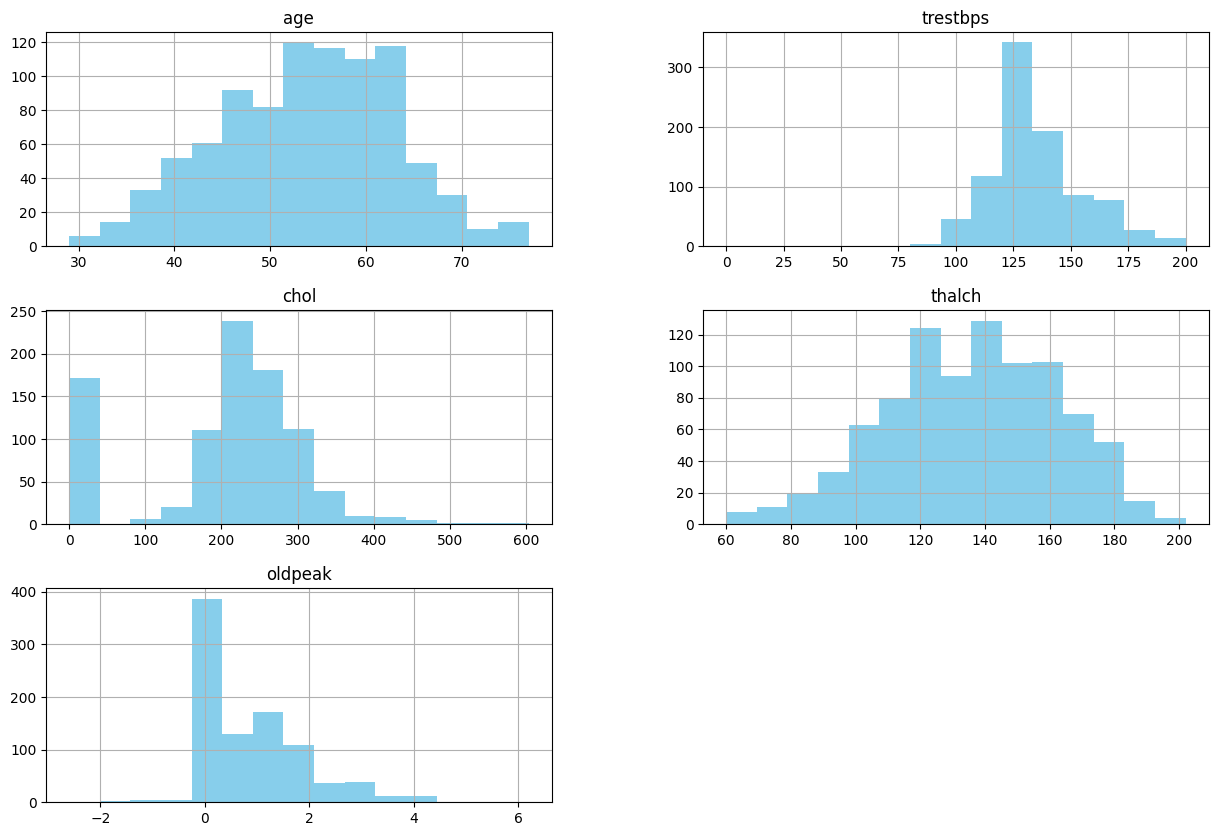

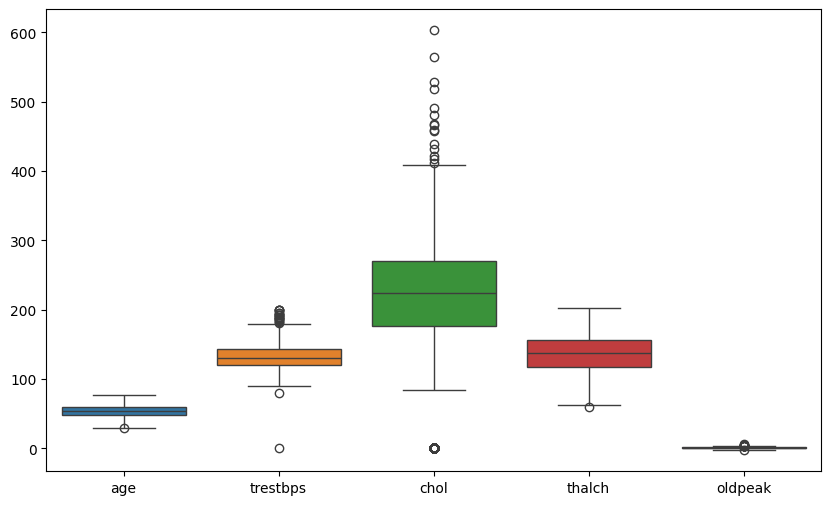

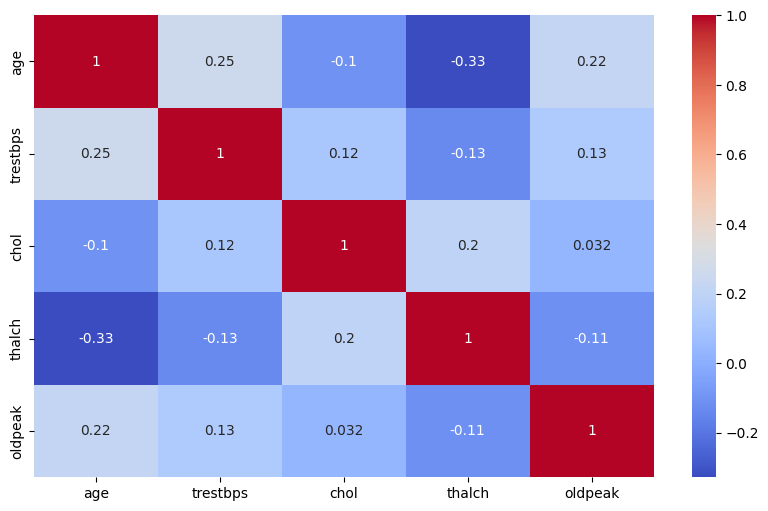

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of numerical features
data[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']].hist(bins=15, figsize=(15, 10), color='skyblue')
plt.show()

# Boxplot for detecting outliers in numerical columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']])
plt.show()

# Correlation heatmap to visualize relationships between numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(data[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']].corr(), annot=True, cmap="coolwarm")
plt.show()


#FEATURE ENGINEERING

In [11]:
# Encoding categorical features using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'], drop_first=True)

# Separating the features (X) and the target (y)
X = data_encoded.drop('num', axis=1)
y = data_encoded['num']

# Splitting the dataset into training and testing sets (80-20 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (726, 19)
y_train shape: (726,)
X_test shape: (182, 19)
y_test shape: (182,)


#DECISSION TREE CLASIFFICATION

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.46703296703296704
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.69      0.70        89
           1       0.30      0.33      0.32        48
           2       0.27      0.18      0.22        22
           3       0.17      0.24      0.20        17
           4       0.00      0.00      0.00         6

    accuracy                           0.47       182
   macro avg       0.29      0.29      0.29       182
weighted avg       0.47      0.47      0.47       182

Confusion Matrix:
[[61 22  1  4  1]
 [16 16  6  8  2]
 [ 2  8  4  7  1]
 [ 4  6  3  4  0]
 [ 3  1  1  1  0]]


In [13]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Perform Grid Search
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_

# Training the model with best hyperparameters
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

# Predictions using optimized model
y_pred_optimized = best_clf.predict(X_test)

# Evaluating the optimized model
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
classification_rep_optimized = classification_report(y_test, y_pred_optimized)

print(f"Optimized Accuracy: {accuracy_optimized}")
print(f"Optimized Classification Report:\n{classification_rep_optimized}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Optimized Accuracy: 0.5659340659340659
Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.84      0.77        89
           1       0.39      0.54      0.46        48
           2       0.00      0.00      0.00        22
           3       0.22      0.12      0.15        17
           4       0.00      0.00      0.00         6

    accuracy                           0.57       182
   macro avg       0.26      0.30      0.28       182
weighted avg       0.47      0.57      0.51       182



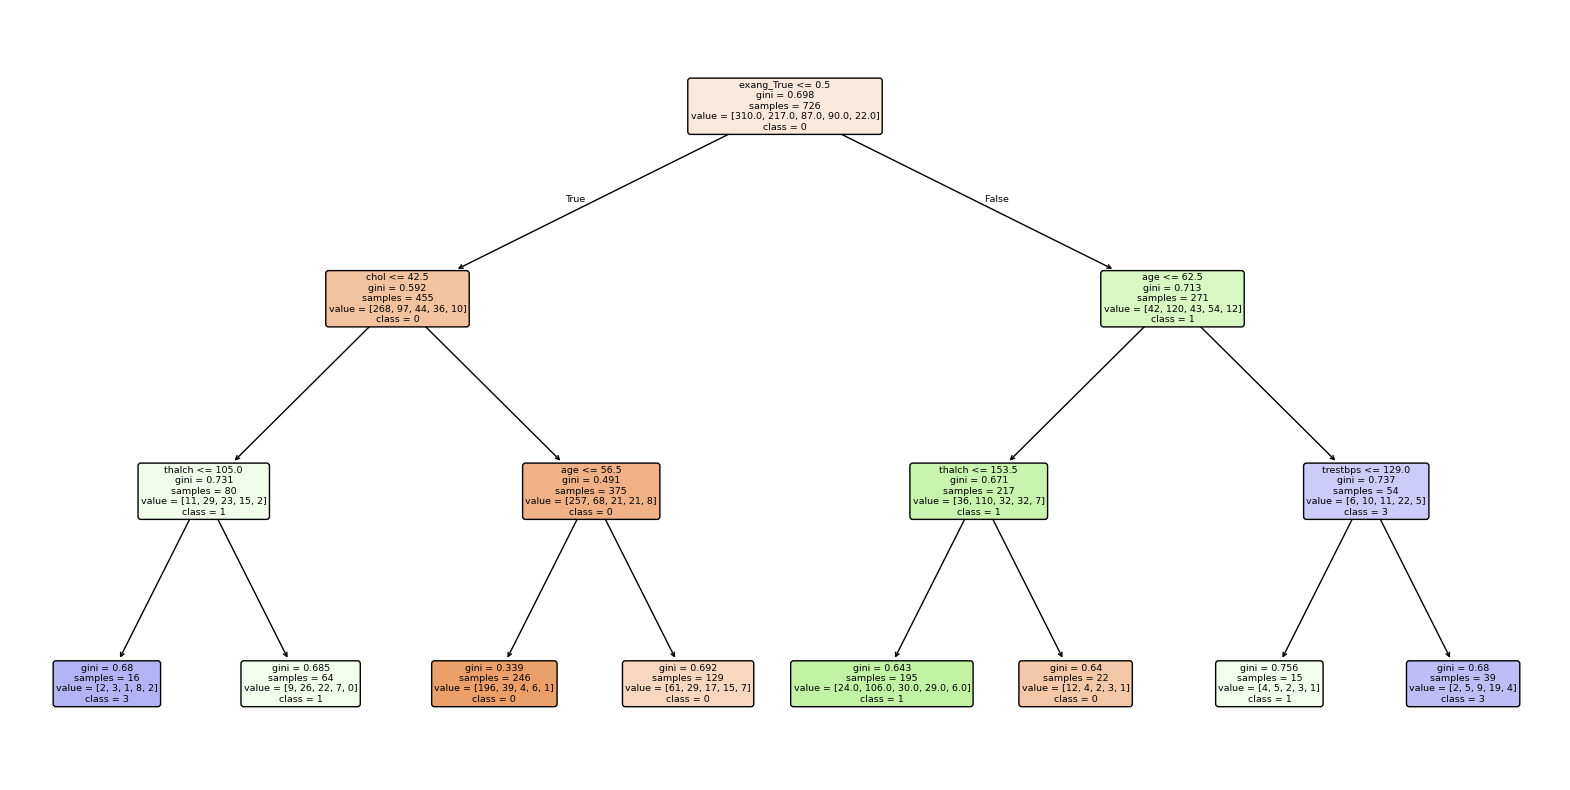

In [15]:
from sklearn.tree import plot_tree

# Get unique class labels from your target variable (y_train or y)
unique_classes = np.unique(y_train)  # Assuming y_train contains your target variable

# Generate class names dynamically based on unique classes
class_names = [str(cls) for cls in unique_classes]

# Plotting the decision tree with dynamic class names
plt.figure(figsize=(20, 10))
plot_tree(best_clf,
          feature_names=X.columns,
          filled=True,
          class_names=class_names,  # Using dynamic class names
          rounded=True)
plt.show()

                     Feature  Importance
12                exang_True    0.433398
2                       chol    0.261453
0                        age    0.187811
4                     thalch    0.098007
1                   trestbps    0.019331
5                    oldpeak    0.000000
3                        fbs    0.000000
7         cp_atypical angina    0.000000
8             cp_non-anginal    0.000000
9          cp_typical angina    0.000000
6                   sex_Male    0.000000
10            restecg_normal    0.000000
11  restecg_st-t abnormality    0.000000
13               exang_FALSE    0.000000
14                exang_TURE    0.000000
15                slope_flat    0.000000
16           slope_upsloping    0.000000
17               thal_normal    0.000000
18    thal_reversable defect    0.000000


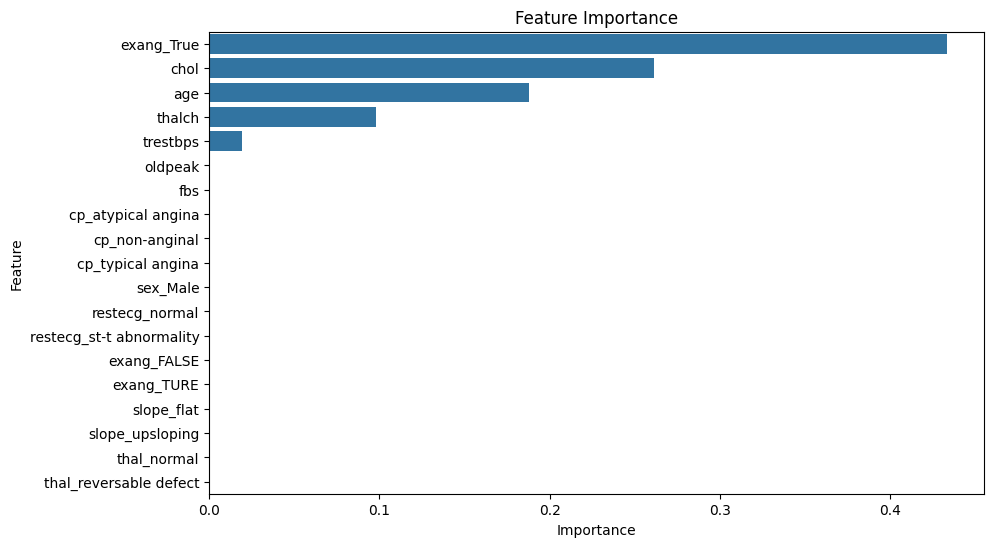

In [16]:
# prompt: feature importance

# Feature Importance
feature_importance = best_clf.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Print or visualize the feature importance
print(feature_importance_df)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


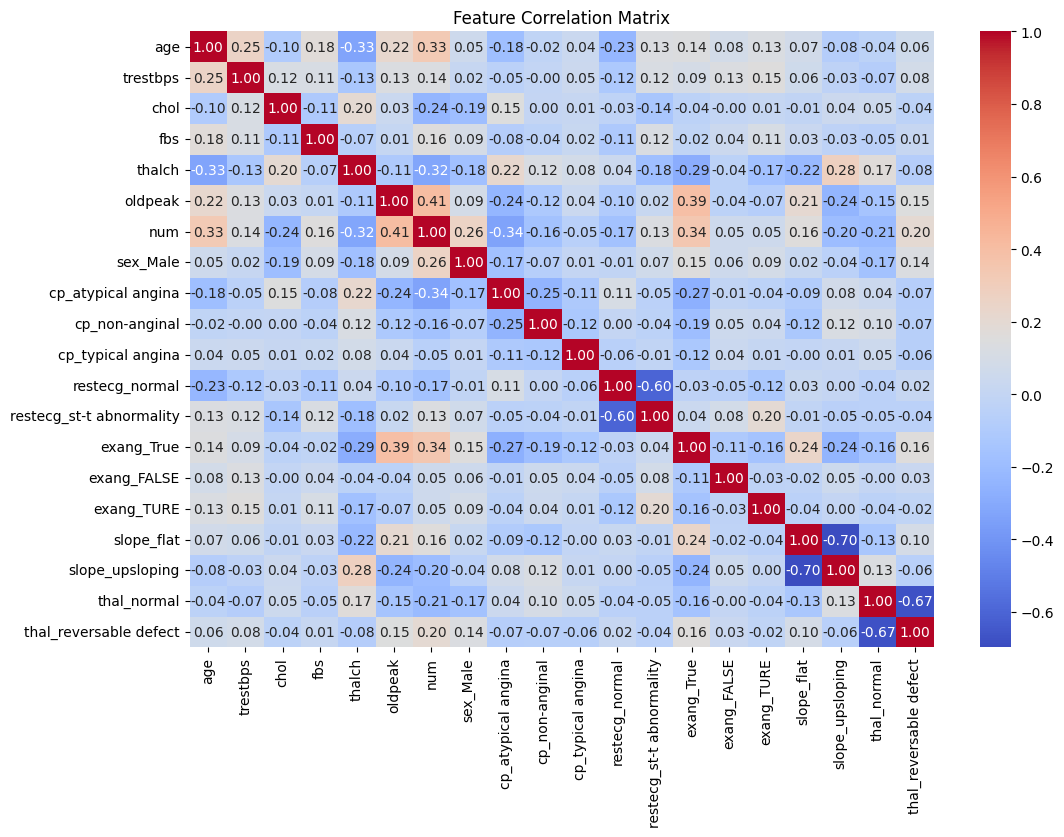

In [17]:
# Correlation matrix for the features
correlation_matrix = data_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


# Interview Questions

## 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

In decision trees, hyperparameters control how the model is trained and how deep or complex the tree structure can become. Some common hyperparameters include:

- **`max_depth`**:
  - This parameter controls the maximum depth of the decision tree.
  - **Effect**: A deeper tree means more complex decision boundaries. Setting this too high can lead to **overfitting** (where the model learns the noise in the data), while setting it too low may lead to **underfitting** (the model is too simple to capture the data's patterns).

- **`min_samples_split`**:
  - This parameter sets the minimum number of samples required to split an internal node.
  - **Effect**: If this value is too small, the tree may grow too complex (overfitting). Increasing this value forces the model to have larger groups of data before splitting, reducing overfitting but risking underfitting.

- **`min_samples_leaf`**:
  - Specifies the minimum number of samples a leaf node must have.
  - **Effect**: A higher value makes the model more conservative by requiring each leaf to have a larger group of data, which helps to prevent overfitting. A smaller value allows for smaller leaves, which can overfit the training data.

- **`max_features`**:
  - Defines the maximum number of features to consider when splitting a node.
  - **Effect**: By limiting the number of features, we can reduce the model’s complexity and computational cost, potentially preventing overfitting and making the tree more generalized.

- **`criterion`**:
  - This hyperparameter specifies the function used to measure the quality of a split (e.g., `gini` or `entropy`).
  - **Effect**: The `gini` index and `entropy` are measures of impurity. While both work well, the choice may lead to slight variations in decision boundaries. `gini` is computationally faster, while `entropy` is more information-theoretic.

- **`max_leaf_nodes`**:
  - Restricts the number of leaf nodes in the tree.
  - **Effect**: Limiting the number of leaf nodes reduces the tree's complexity, helping to prevent overfitting.

- **`splitter`**:
  - Controls how to choose the split at each node (`best` or `random`).
  - **Effect**: `best` will consider all possible splits, which can be more accurate but slower, while `random` introduces randomness in the splits, which can lead to a faster model but may result in different performance.

By tuning these hyperparameters, we can control the trade-off between overfitting and underfitting, which significantly impacts the model’s performance on unseen data.

---

## 2. What is the difference between Label encoding and One-hot encoding?

- **Label Encoding**:
  - **How it works**: This encoding method assigns a unique integer to each category. For example, if a feature has categories like `['Red', 'Blue', 'Green']`, they could be encoded as `[0, 1, 2]`.
  - **When to use**: Label encoding is useful when the categorical feature has an inherent order or ranking (e.g., `Low`, `Medium`, `High`).
  - **Disadvantages**: In cases where there’s no natural order between categories, label encoding may create misleading relationships between values. For instance, encoding `['Cat', 'Dog', 'Rabbit']` as `[0, 1, 2]` implies that `Cat < Dog < Rabbit`, which is not meaningful.

- **One-hot Encoding**:
  - **How it works**: One-hot encoding creates a binary column for each category. For instance, if a feature has three categories `['Red', 'Blue', 'Green']`, one-hot encoding will create three binary columns (e.g., `Red: [1, 0, 0]`, `Blue: [0, 1, 0]`, `Green: [0, 0, 1]`).
  - **When to use**: One-hot encoding is ideal for features where categories have no ordinal relationship (e.g., colors, types of animals).
  - **Disadvantages**: One-hot encoding increases the dimensionality of the dataset, especially if the feature has many unique categories, which may result in higher memory usage and longer training times.

---

In summary:
- **Label encoding** is simpler but may introduce unintended order between categories, which can confuse models.
- **One-hot encoding** prevents this issue but increases the dataset’s size due to the creation of multiple binary columns.
